<a href="https://colab.research.google.com/github/HenryZumaeta/MASTER/blob/Zeta/STAT/PrimerTrabajoPractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAREA

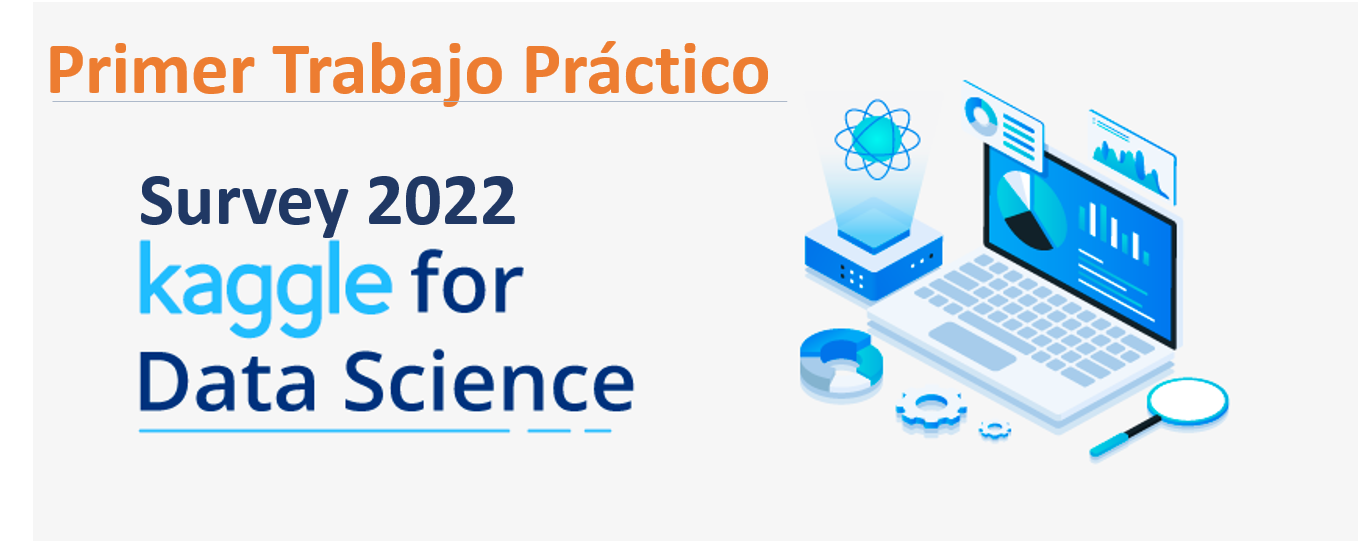

**CONTEXTO**

Anualmente una encuesta es enviada a toda la comunidad de Kaggle, estando disponible desde el 16 de agosto de 2022 hasta el 16 de septiembre de 2022. Esta encuesta tenía como objetivo recopilar datos sobre la comunidad de científicos de datos, ingenieros de machine learning y profesionales afines. Los resultados de la encuesta proporcionaban información valiosa sobre tendencias, herramientas, tecnologías y salarios en el campo de la ciencia de datos y el aprendizaje automático.

**OBJETIVOS:**

Usando análisis exploratorio, se busca:

+ Tener un perfil demográfico de los encuestados
+ Tener una descripción del tipo de trabajo que realizan
+ Saber que herramientas de ciencia de datos emplean frecuentemente
+ Salario promedio actual

No es necesario usar todas las preguntas del cuestionario, sólo seleccionar aquellas que considere necesario para poder entender como es el científico de datos actualmente.

**MATERIALES DE TRABAJO**

Para el desarrollo del trabajo se tiene:

+ kaggle_Cuestionario_2022_Preguntas.pdf: Contiene todas las preguntas que se hicieron en el estudio.
+ kaggle_survey_2022_responses.csv: Base de datos con un total de 23997 encuestados

**ENTREGABLE**

Se deberá trabajar en este cuaderno de trabajo todo el análisis desarrollado, explicando paso a paso la lógica usada y sus conclusiones finales (debe espicificar si se usa R o Python).

# SOLUCIÓN

In [ ]:
# Cargamos las librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df  = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRRS7N1KM4cYuyVIrW76-aA08-xa9M5p0plfCLtgzJRXL2-7A2lh2HCj_s_6AWFL9Q5fSK4sjTEroMS/pub?gid=395837276&single=true&output=csv")

<ipython-input-2-c3c5f407d471>:1: DtypeWarning: Columns (207,224,254,256,259,269,270,276) have mixed types. Specify dtype option on import or set low_memory=False.
  df  = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRRS7N1KM4cYuyVIrW76-aA08-xa9M5p0plfCLtgzJRXL2-7A2lh2HCj_s_6AWFL9Q5fSK4sjTEroMS/pub?gid=395837276&single=true&output=csv")


In [ ]:
# Confirmar la lectura
df.head(3)

,Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,Udacity,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN


In [ ]:
# Número de registros y variables
df.shape

(23997, 295)

## PERFIL DEMOGRÁFICO DE LOS ENCUESTADOS

Para realizar un perfil demográfico, las variables más importantes a considerar son:
* Q2 = Rango de edad
* Q3 = Género
* Q4 = País de residencia
* Q5 = ¿Es estudiante actualmente?
* Q6 = Plataformas de aprendizaje de ciencia de datos
* Q7 = Recursos útiles al comenzar en ciencia de datos
* Q8 = Nivel más alto de educación formal
* Q11 = Años de experiencia escribiendo código
* Q12 = Lenguajes de programación utilizados

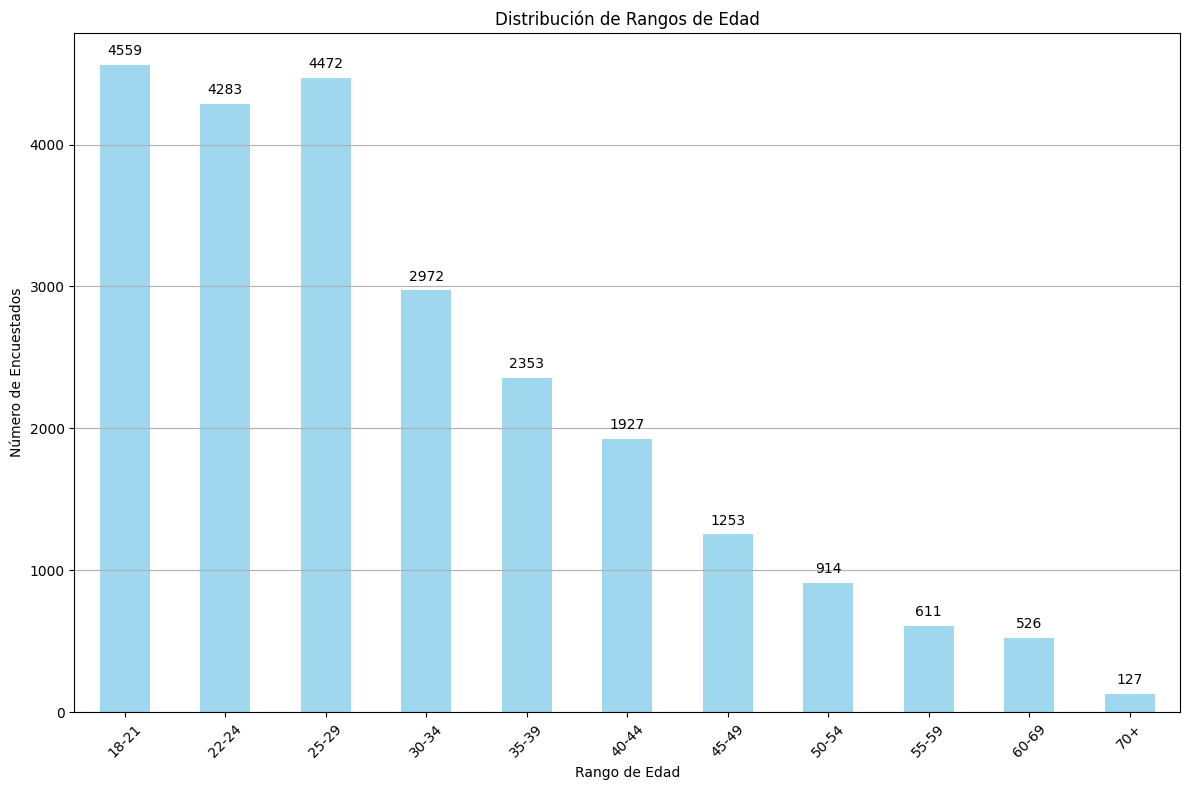

In [ ]:
# Q2

# Contar las frecuencias de cada rango de edad
age_counts = df['Q2'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
ax = age_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Agregar las etiquetas con la cantidad en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribución de Rangos de Edad")
plt.xlabel("Rango de Edad")
plt.ylabel("Número de Encuestados")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

La comunidad de Kaggle está dominada por individuos de 18-21 años. También hay una presencia notable de personas de 18-24 años, indicando una activa participación de estudiantes y recién graduados. Aunque hay 2353 encuestados de 35-39 años, las cifras decrecen con rangos de edad mayores. Este patrón sugiere que la ciencia de datos atrae principalmente a las generaciones más jóvenes.

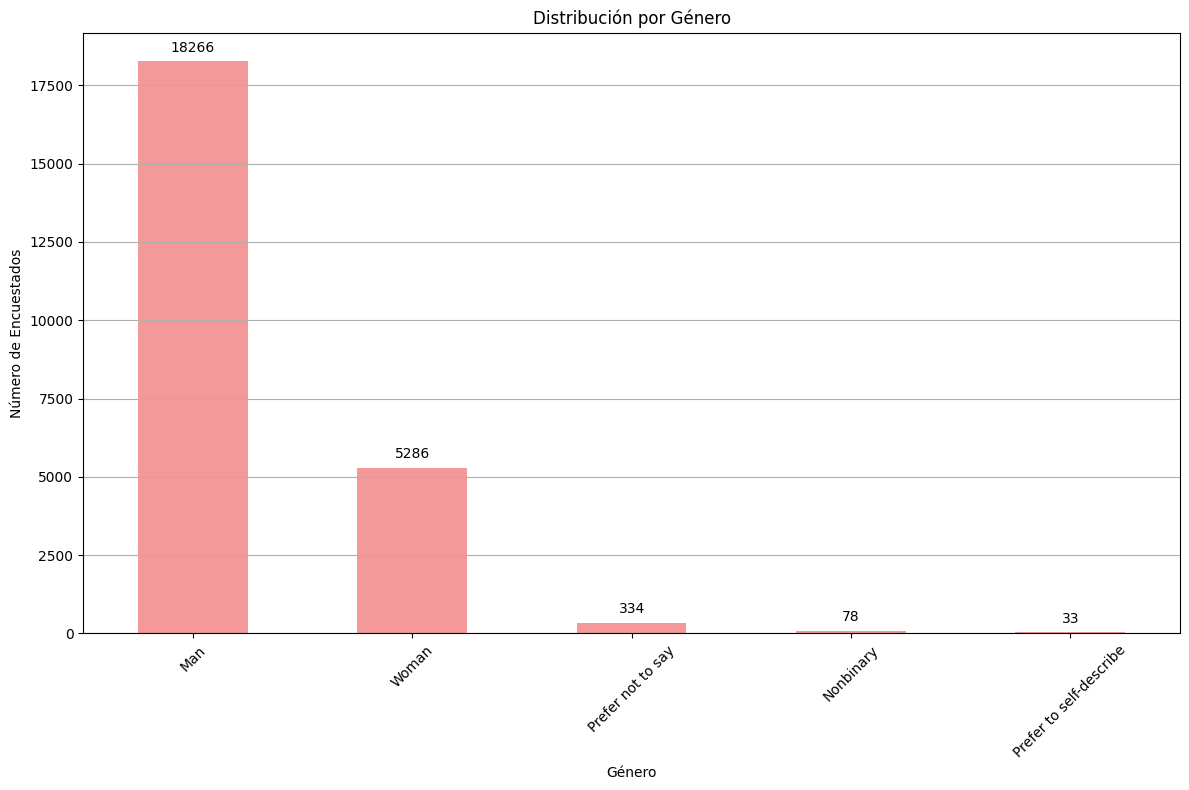

In [ ]:
# Q3
# Contar las frecuencias para la variable Q3 (Género)
gender_counts = df['Q3'].value_counts()

# Crear la gráfica de barras con etiquetas en cada barra
plt.figure(figsize=(12, 8))
ax = gender_counts.plot(kind='bar', color='lightcoral', alpha=0.8)

# Agregar las etiquetas con la cantidad en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Número de Encuestados")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

A partir de esta gráfica, podemos observar claramente que la mayoría de los encuestados se identifican como hombres, seguidos por una cantidad significativamente menor que se identifica como mujeres. Las otras categorías, como "Nonbinary", "Prefer to self-describe" y "Prefer not to say", tienen representaciones menores en comparación.

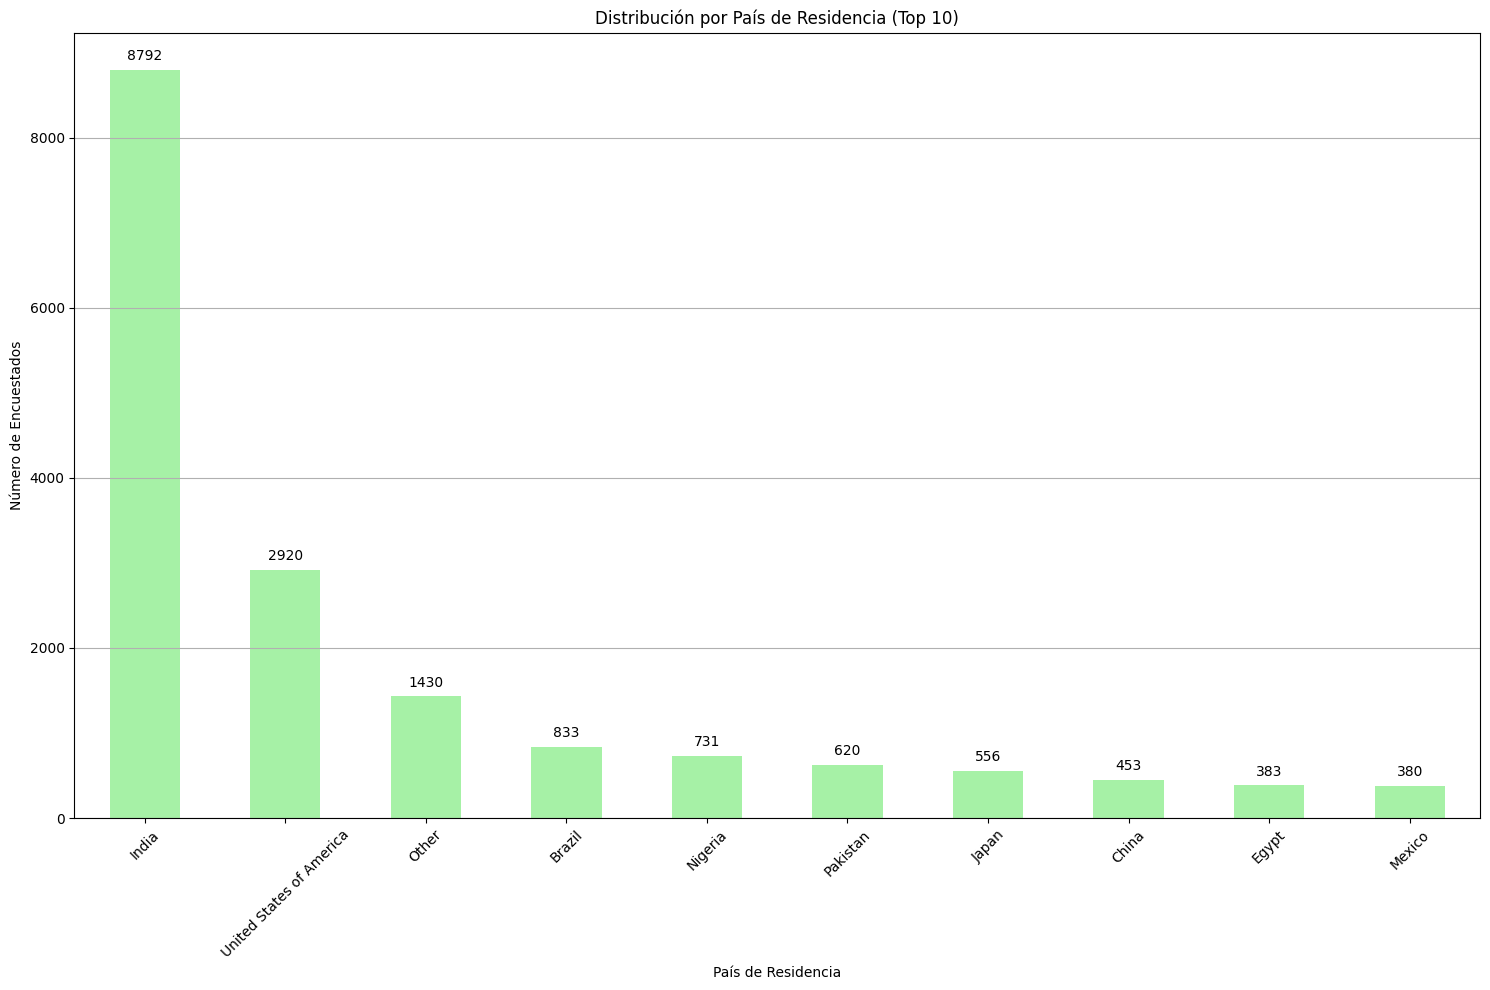

In [ ]:
# Contar las frecuencias para la variable Q4 (País de residencia)
country_counts = df['Q4'].value_counts().head(10)  # Tomamos los 10 países con más respuestas para mejor visualización

# Crear la gráfica de barras con etiquetas en cada barra
plt.figure(figsize=(15, 10))
ax = country_counts.plot(kind='bar', color='lightgreen', alpha=0.8)

# Agregar las etiquetas con la cantidad en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribución por País de Residencia (Top 10)")
plt.xlabel("País de Residencia")
plt.ylabel("Número de Encuestados")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

Desde la gráfica, podemos notar lo siguiente:

India y Estados Unidos tienen la mayor cantidad de encuestados, lo que indica una fuerte presencia de la comunidad de Kaggle en estos dos países.
Otros países, como Brasil, Nigeria, Pakistan y Japan, también tienen una representación notable.
En general, vemos una diversidad geográfica en la comunidad, con representantes de diferentes continentes y regiones del mundo.
Esta distribución geográfica nos brinda una idea de la globalidad y diversidad de la comunidad de Kaggle.

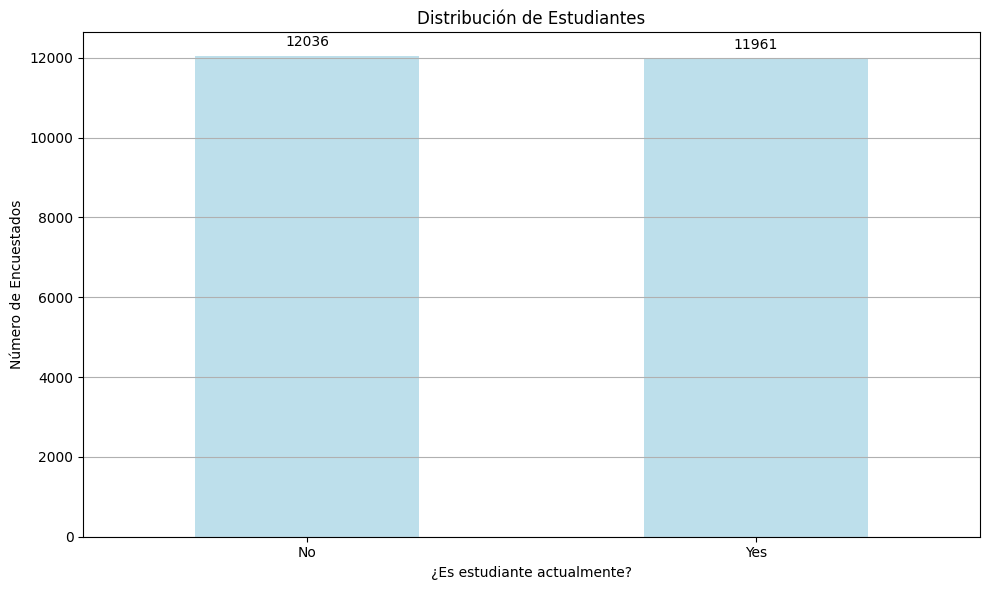

In [ ]:
# Q5
# Contar las frecuencias para la variable Q5 (¿Es estudiante actualmente?)
student_counts = df['Q5'].value_counts()

# Crear la gráfica de barras con etiquetas en cada barra
plt.figure(figsize=(10, 6))
ax = student_counts.plot(kind='bar', color='lightblue', alpha=0.8)

# Agregar las etiquetas con la cantidad en cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribución de Estudiantes")
plt.xlabel("¿Es estudiante actualmente?")
plt.ylabel("Número de Encuestados")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

La mayoría de los encuestados no son estudiantes en la actualidad.
Sin embargo, hay una proporción significativa que sí se identifica como estudiantes, ya sea en la escuela secundaria, la universidad o en estudios de posgrado.
Esto sugiere que, aunque hay una gran cantidad de profesionales activos en la comunidad de Kaggle, también hay un número considerable de estudiantes que utilizan la plataforma, posiblemente para aprender, practicar y mejorar sus habilidades en ciencia de datos.

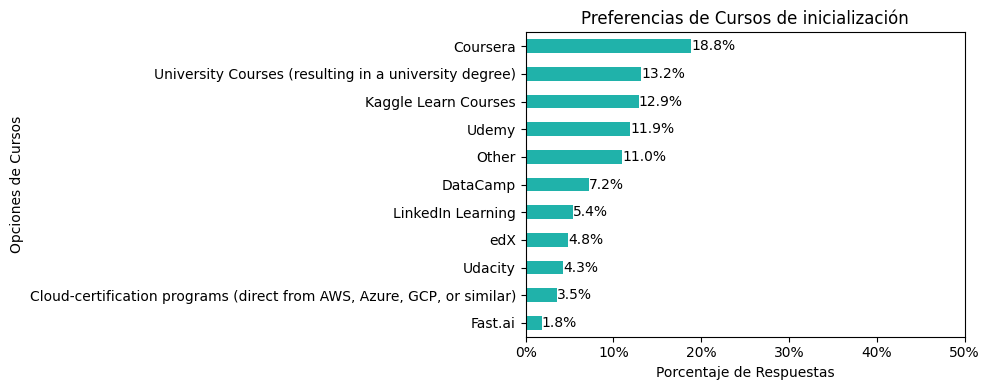

In [ ]:
# Q6
import matplotlib.ticker as mtick

# Identificar las columnas relacionadas con la pregunta Q6
columnas = [label for label in df.columns if label.startswith('Q6_')]
validador = len(columnas)

# Obtener respuestas según si es una pregunta simple o múltiple
if validador == 0:
    columnas = 'Q6'
    respuestas_por_opcion = df[columnas].value_counts(normalize=True)
else:
    df_temp = df[columnas].copy()
    df_temp['Todas las Respuestas'] = df_temp.apply(lambda row: ';'.join(row.dropna()) if not row.isnull().all() else 'S.I.', axis=1)
    respuestas_por_opcion = df_temp['Todas las Respuestas'].str.split(';').explode().value_counts(normalize=True)

# Filtrar y ordenar respuestas
respuestas_por_opcion = respuestas_por_opcion[respuestas_por_opcion.index != 'None'].sort_values(ascending=True)

# Crear gráfica
ax = respuestas_por_opcion.plot(kind='barh', figsize=(10, 4), color='lightseagreen')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for index, value in enumerate(respuestas_por_opcion):
    ax.text(value, index, f'{value:.1%}', va='center')  # Agregar porcentajes como etiquetas

plt.gca().set_xlim(right=0.5)
plt.ylabel('Opciones de Cursos')
plt.xlabel('Porcentaje de Respuestas')
plt.title('Preferencias de Cursos de inicialización')
plt.tight_layout()
plt.show()

La gráfica muestra claramente las preferencias de los encuestados, con Coursera, University Courses y Kaggle Learn Courses siendo las opciones más populares

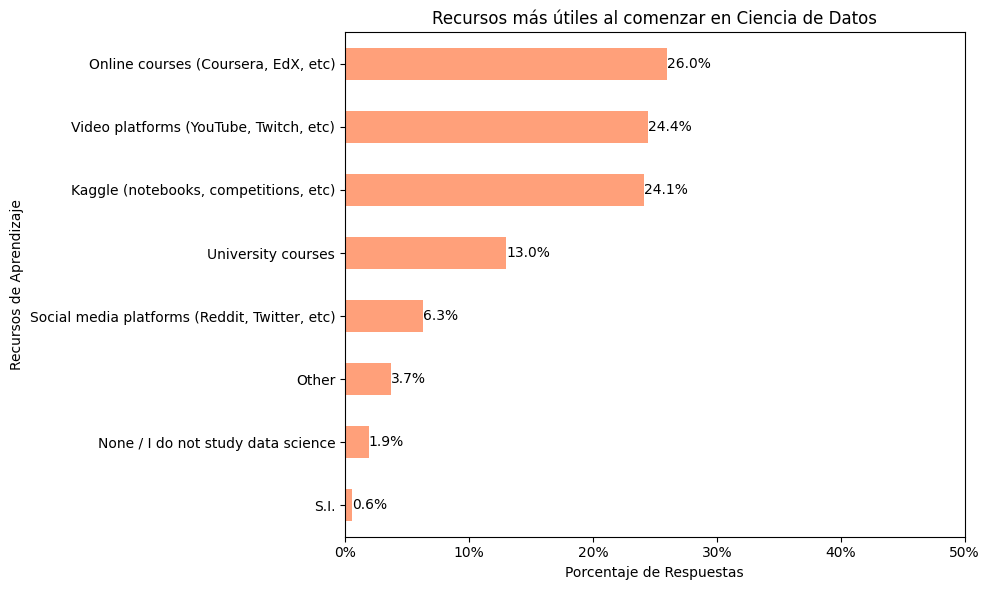

In [ ]:
# Q7
# Identificar las columnas relacionadas con la pregunta Q7
columnas = [label for label in df.columns if label.startswith('Q7_')]
validador = len(columnas)

# Obtener respuestas según si es una pregunta simple o múltiple
if validador == 0:
    columnas = 'Q7'
    respuestas_por_opcion = df[columnas].value_counts(normalize=True)
else:
    df_temp = df[columnas].copy()
    df_temp['Todas las Respuestas'] = df_temp.apply(lambda row: ';'.join(row.dropna()) if not row.isnull().all() else 'S.I.', axis=1)
    respuestas_por_opcion = df_temp['Todas las Respuestas'].str.split(';').explode().value_counts(normalize=True)

# Filtrar y ordenar respuestas
respuestas_por_opcion = respuestas_por_opcion[respuestas_por_opcion.index != 'None'].sort_values(ascending=True)

# Crear gráfica
ax = respuestas_por_opcion.plot(kind='barh', figsize=(10, 6), color='lightsalmon')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
for index, value in enumerate(respuestas_por_opcion):
    ax.text(value, index, f'{value:.1%}', va='center')  # Agregar porcentajes como etiquetas

plt.gca().set_xlim(right=0.5)
plt.ylabel('Recursos de Aprendizaje')
plt.xlabel('Porcentaje de Respuestas')
plt.title('Recursos más útiles al comenzar en Ciencia de Datos')
plt.tight_layout()
plt.show()

Las cursos en línea (como Coursera, EdX, etc.) son populares, lo que refleja la accesibilidad y variedad de estos recursos en línea.
Kaggle (notebooks, competencias, etc.) ocupa una posición notable, lo que indica que la propia plataforma Kaggle es un recurso valioso para muchos que están empezando en este campo.
Las cursos universitarios son el recurso también mencionado, lo que sugiere que muchos encuestados valoran la educación formal en ciencia de datos.
Estos resultados reflejan la variedad de recursos y plataformas que los profesionales y estudiantes de ciencia de datos utilizan en sus primeras etapas de aprendizaje.

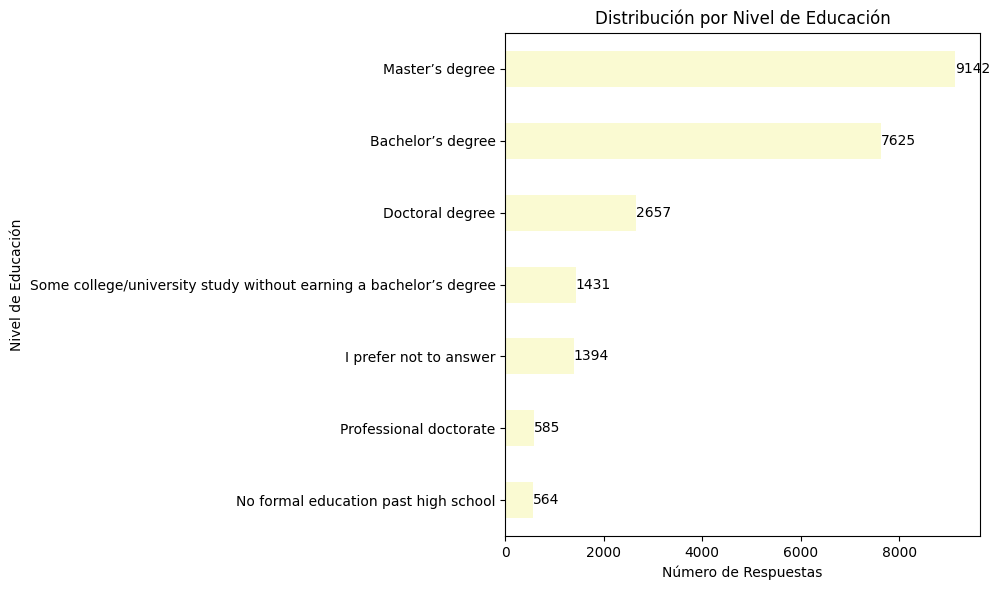

In [ ]:
# Q8
# Ordenar y contar las frecuencias para la variable Q8 (Nivel de educación)
education_counts = df['Q8'].value_counts()
education_sorted = education_counts.sort_values(ascending=True)

# Crear gráfica de barras horizontal para el nivel de educación
ax = education_sorted.plot(kind='barh', figsize=(10, 6), color='lightgoldenrodyellow')
for index, value in enumerate(education_sorted):
    ax.text(value, index, str(value), va='center')  # Agregar cantidad exacta como etiquetas

plt.gca().set_xlim(right=education_sorted.max() + 500)  # Ajuste para que las etiquetas no queden fuera del gráfico
plt.ylabel('Nivel de Educación')
plt.xlabel('Número de Respuestas')
plt.title('Distribución por Nivel de Educación')
plt.tight_layout()
plt.show()

La mayoría de los encuestados poseen un grado de maestría, lo que indica que una gran proporción de la comunidad de Kaggle ha buscado una formación educativa avanzada.
El grado de bachiller es el segundo nivel de educación más común entre los encuestados, lo que sugiere que muchos profesionales también tienen formación universitaria.
Un número significativo de encuestados ha alcanzado un doctorado, lo que refleja la presencia de académicos e investigadores en la comunidad.
Pocos encuestados indicaron niveles de educación más bajos o estudios universitarios sin completar

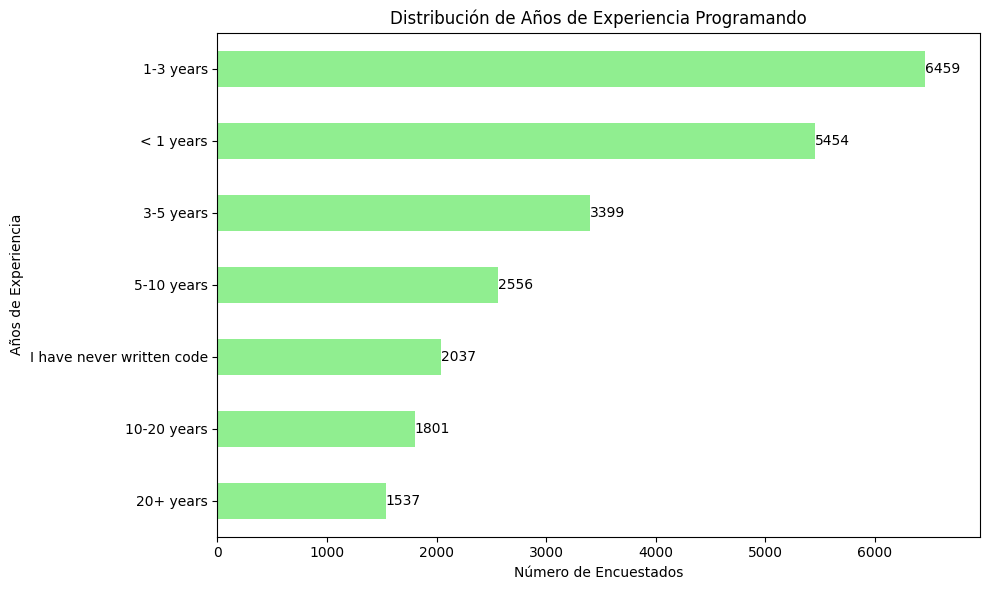

In [ ]:
#Q11
# Contar las frecuencias para la variable Q11 (Años de experiencia escribiendo código o programando)
coding_experience_counts = df['Q11'].value_counts()
coding_experience_sorted = coding_experience_counts.sort_values(ascending=True)

# Crear gráfica de barras horizontal
ax = coding_experience_sorted.plot(kind='barh', figsize=(10, 6), color='lightgreen')
for index, value in enumerate(coding_experience_sorted):
    ax.text(value, index, str(value), va='center')  # Agregar cantidad exacta como etiquetas

plt.gca().set_xlim(right=coding_experience_sorted.max() + 500)
plt.ylabel('Años de Experiencia')
plt.xlabel('Número de Encuestados')
plt.title('Distribución de Años de Experiencia Programando')
plt.tight_layout()
plt.show()


Una gran proporción de encuestados tiene entre 3-5 años de experiencia programando, lo que sugiere que muchos están en una etapa intermedia de su carrera técnica.
Hay un número significativo de encuestados con menos de 1 año y entre 1-3 años de experiencia, indicando una buena cantidad de principiantes o aquellos que recién han empezado a programar.
También es notable la presencia de profesionales con 5-10 años y 10-20 años de experiencia, reflejando a aquellos que tienen una carrera más consolidada en el campo.

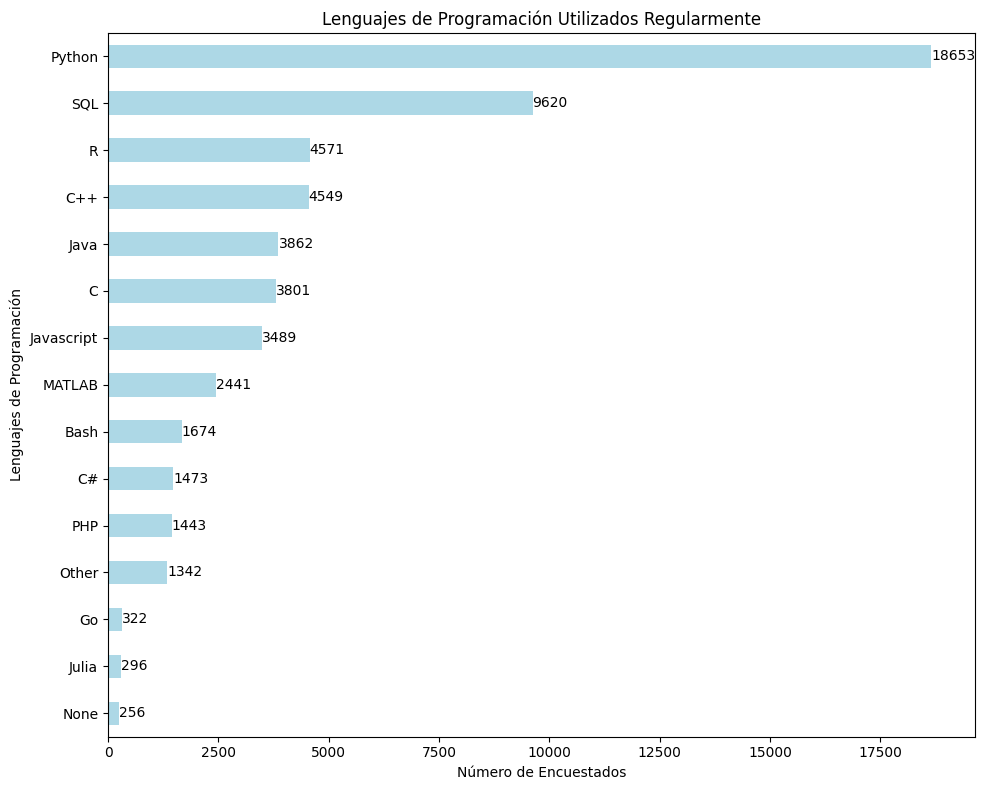

In [ ]:
#Q12
# Contar las frecuencias para la variable Q12 (Lenguajes de programación utilizados regularmente)
languages_columns = [col for col in df.columns if col.startswith('Q12_')]
df_languages = df[languages_columns].melt()

# Contar las frecuencias de cada lenguaje de programación
languages_counts = df_languages['value'].value_counts()
languages_sorted = languages_counts.sort_values(ascending=True)

# Crear gráfica de barras horizontal
ax = languages_sorted.plot(kind='barh', figsize=(10, 8), color='lightblue')
for index, value in enumerate(languages_sorted):
    ax.text(value, index, str(value), va='center')  # Agregar cantidad exacta como etiquetas

plt.gca().set_xlim(right=languages_sorted.max() + 1000)  # Ajuste para que las etiquetas no queden fuera del gráfico
plt.ylabel('Lenguajes de Programación')
plt.xlabel('Número de Encuestados')
plt.title('Lenguajes de Programación Utilizados Regularmente')
plt.tight_layout()
plt.show()


Python es, con diferencia, el lenguaje de programación más popular entre los encuestados, lo que refleja su importancia y prevalencia en la ciencia de datos y el aprendizaje automático.
SQL, que es esencial para la manipulación y consulta de bases de datos, es el segundo lenguaje más utilizado.
Lenguajes como R, C++, Java, C y JavaScript también tienen una presencia notable, lo que indica su utilidad en diferentes aspectos del análisis de datos y desarrollo.
Estos resultados brindan una visión clara de las herramientas y lenguajes que los profesionales de la ciencia de datos utilizan con más frecuencia en su trabajo diario.

## DESCRIPCIÓN DE TIPO DE TRABAJO QUE REALIZAN

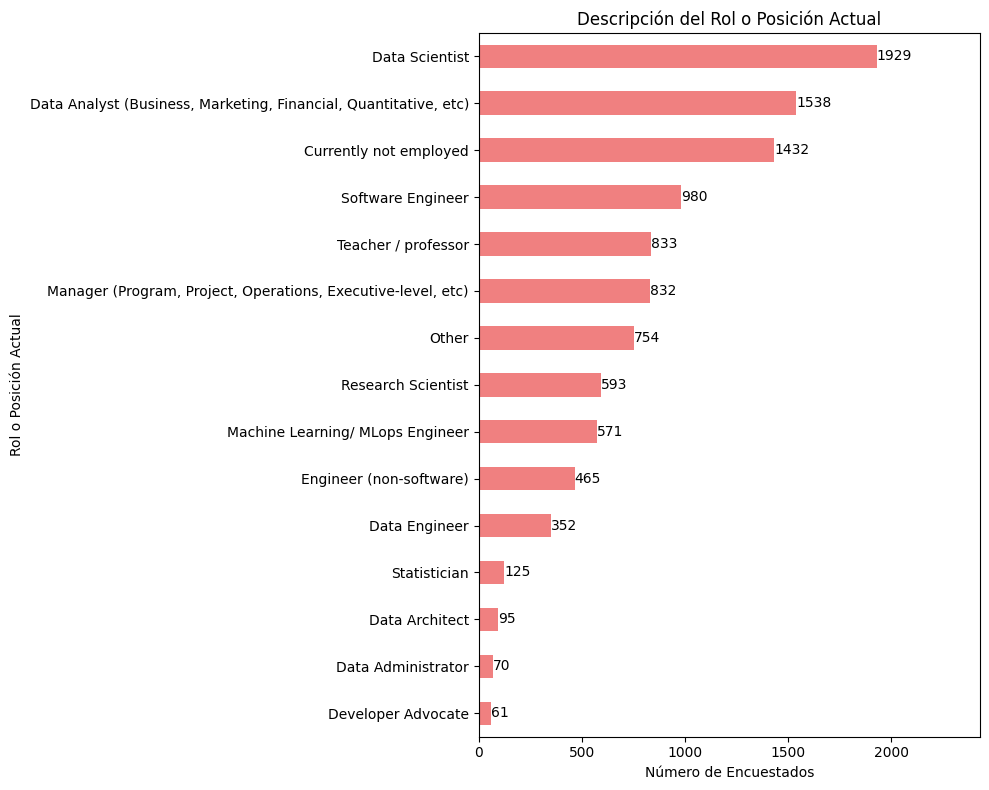

In [ ]:
# Contar las frecuencias para la variable Q5 (Rol o posición actual)
current_role_counts = df['Q23'].value_counts(dropna=True)
current_role_sorted = current_role_counts.sort_values(ascending=True)

# Crear gráfica de barras horizontal para el rol o posición actual
ax = current_role_sorted.plot(kind='barh', figsize=(10, 8), color='lightcoral')
for index, value in enumerate(current_role_sorted):
    ax.text(value, index, str(value), va='center')  # Agregar cantidad exacta como etiquetas

plt.gca().set_xlim(right=current_role_sorted.max() + 500)  # Ajuste para que las etiquetas no queden fuera del gráfico
plt.ylabel('Rol o Posición Actual')
plt.xlabel('Número de Encuestados')
plt.title('Descripción del Rol o Posición Actual')
plt.tight_layout()
plt.show()

Una gran mayoría de los encuestados se identifican como Data Scientists, lo que refleja la naturaleza de la comunidad de Kaggle y su enfoque en la ciencia de datos.
Otras posiciones notables incluyen Software Engineers, Data Analysts y Research Scientists.
Hay también una representación significativa de Students, lo que sugiere que muchos están en proceso de formación o están explorando la ciencia de datos como una futura carrera.

## QUÉ HERRAMIENTAS DE CIENCIAS DE DATOS EMPLEAN FRECUENTEMENTE

In [ ]:
# Redefinir las columnas y preguntas seleccionadas
selected_questions = ['Q13', 'Q14', 'Q35', 'Q36']
selected_columns = [col for col in df.columns if any(question in col for question in selected_questions)]

# Crear tablas de frecuencias relativas (en porcentaje) para cada pregunta seleccionada
tables_percentage = {}

for question in selected_questions:
    question_columns = [col for col in selected_columns if question in col]
    question_data = df[question_columns].melt()
    relative_freq = question_data['value'].value_counts(normalize=True, dropna=True) * 100
    tables_percentage[question] = relative_freq.sort_values(ascending=False).reset_index().rename(columns={'index': 'Respuesta', 'value': f'{question} - Porcentaje (%)'})

print("-"*60)
print("IDE´s")
print(tables_percentage['Q13'])
print("-"*60)
print("NOTEBOOK")
print(tables_percentage['Q14'])
print("-"*60)
print("BASE DE DATOS")
print(tables_percentage['Q35'])
print("-"*60)
print("BI TOOLS")
print(tables_percentage['Q36'])

------------------------------------------------------------
IDE´s
                      Respuesta  Q13 - Porcentaje (%)
0              Jupyter Notebook             23.146143
1   Visual Studio Code (VSCode)             16.874154
2                       PyCharm             10.316306
3                    JupyterLab              8.266238
4                 Visual Studio              7.469553
5                     Notepad++              6.581529
6                       RStudio              6.468200
7                        Spyder              4.871448
8                        MATLAB              3.893775
9                  Sublime Text              3.751691
10                     IntelliJ              2.726658
11                        Other              2.493234
12                  Vim / Emacs              2.449256
13                         None              0.691813
------------------------------------------------------------
NOTEBOOK
                             Respuesta  Q14 - Porcent

## SALARIO PROMEDIO ACTUAL

La pregunta Q29: What is your current yearly compensation (approximate $USD)?

Es una variable categórica, de tal forma no se puede determinar su promedio, pero como medida central se puede determinar la moda.

In [ ]:
# Determinar la moda de la variable Q29
salary_mode_value = df['Q29'].mode().iloc[0]
salary_mode_count = df['Q29'].value_counts().iloc[0]

salary_mode_value, salary_mode_count

('$0-999', 1112)

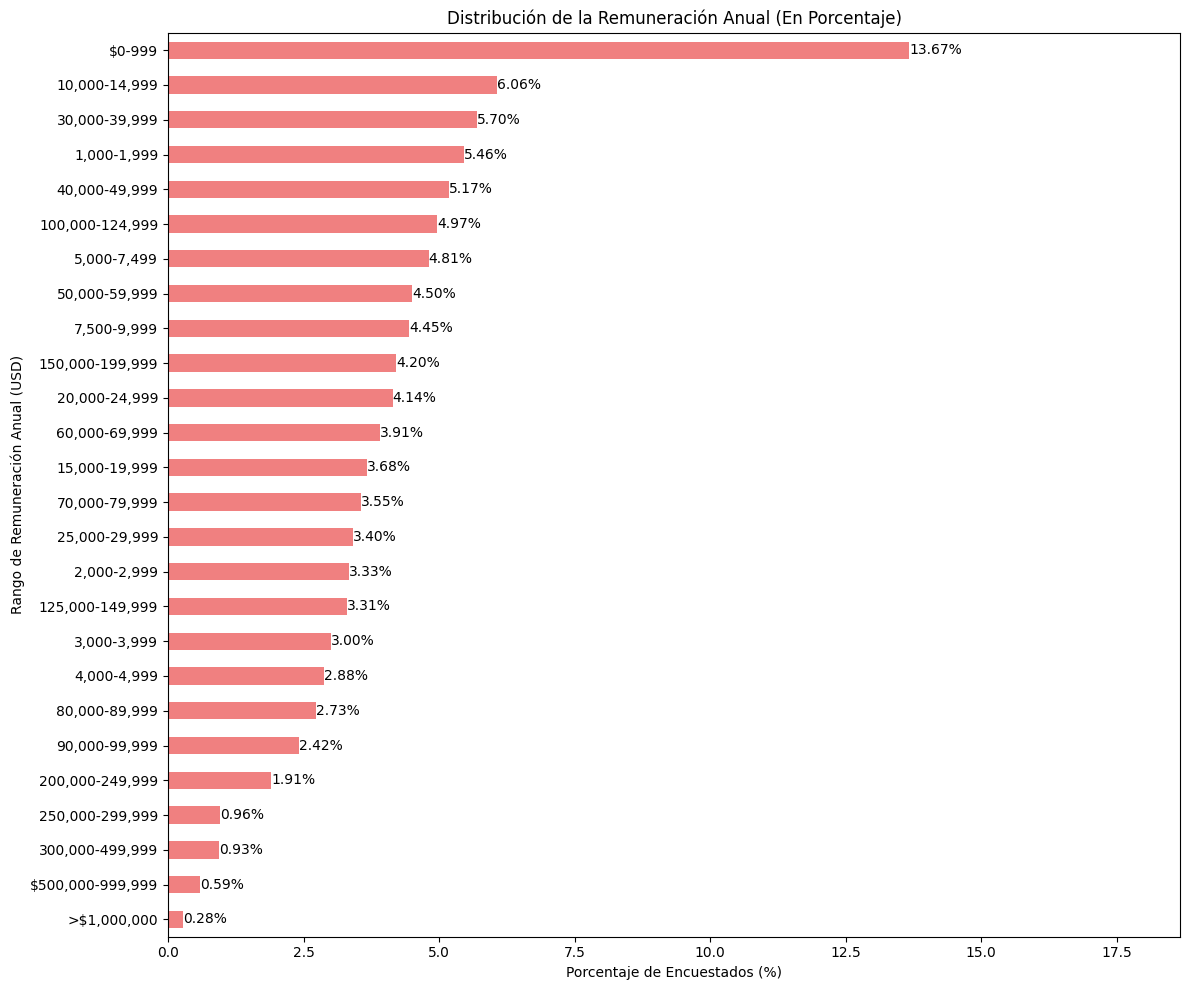

In [ ]:
# Filtrar el conjunto de datos basado en las condiciones dadas: Q5 = No y Q23 != unemployed
filtered_df = df[(df['Q5'] == 'No') & (df['Q23'] != 'unemployed')]

# Calcular las frecuencias relativas (en porcentaje) para la variable Q29 (Remuneración anual) en el DataFrame filtrado
salary_percentage = filtered_df['Q29'].value_counts(normalize=True, dropna=True) * 100
salary_sorted_percentage = salary_percentage.sort_values(ascending=True)

# Crear gráfica de barras horizontal para la remuneración anual
ax = salary_sorted_percentage.plot(kind='barh', figsize=(12, 10), color='lightcoral')
for index, value in enumerate(salary_sorted_percentage):
    ax.text(value, index, f'{value:.2f}%', va='center')  # Agregar porcentaje exacto como etiquetas

plt.gca().set_xlim(right=salary_sorted_percentage.max() + 5)  # Ajuste para que las etiquetas no queden fuera del gráfico
plt.ylabel('Rango de Remuneración Anual (USD)')
plt.xlabel('Porcentaje de Encuestados (%)')
plt.title('Distribución de la Remuneración Anual (En Porcentaje)')
plt.tight_layout()
plt.show()

El análisis confirma que el rango salarial más común es de 0 a 999 dólares.

Sin embargo, para determinar el salario promedio, se calcula la media de cada rango tal cómo se estructuran los datos, obteniendo así el sueldo anual medio.

In [ ]:
# Crear una copia del DataFrame filtrado
filtered_df_copy = filtered_df.copy()

# Debido a que la columna Q29 es categórica, primero necesitamos asignar un valor promedio a cada categoría
salary_mapping = {
    '$0-999': 500,
    '1,000-1,999': 1500,
    '2,000-2,999': 2500,
    '3,000-3,999': 3500,
    '4,000-4,999': 4500,
    '5,000-7,499': 6250,
    '7,500-9,999': 8750,
    '10,000-14,999': 12500,
    '15,000-19,999': 17500,
    '20,000-24,999': 22500,
    '25,000-29,999': 27500,
    '30,000-39,999': 35000,
    '40,000-49,999': 45000,
    '50,000-59,999': 55000,
    '60,000-69,999': 65000,
    '70,000-79,999': 75000,
    '80,000-89,999': 85000,
    '90,000-99,999': 95000,
    '100,000-124,999': 112500,
    '125,000-149,999': 137500,
    '150,000-199,999': 175000,
    '200,000-249,999': 225000,
    '250,000-299,999': 275000,
    '300,000-500,000': 400000,
    '> $500,000': 600000  # Asignamos un valor representativo aunque el límite superior no esté definido
}

# Convertir la columna Q29 a valores numéricos basados en el mapeo anterior en la copia del DataFrame
filtered_df_copy['Q29_mapped'] = filtered_df_copy['Q29'].map(salary_mapping)

# Calcular el promedio
average_salary = filtered_df_copy['Q29_mapped'].mean()
print(f"El sueldo promedio anual aproximado es {round(average_salary,2)} dólares")

El sueldo promedio anual aproximado es 46297.44 dólares
